# Customer Churn Prediction using Machine Learning

This project focuses on predicting customer churn using supervised machine learning models. 
The goal is to identify customers likely to leave the service and understand key factors influencing churn.


## 1. Import Required Libraries


In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Understand the Dataset


In [55]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
data.shape

(7043, 21)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3. Data Cleaning and Preprocessing


- Converted target variable to numeric
- Handled missing values
- Encoded categorical features


In [59]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

data['Churn']= le.fit_transform(data['Churn'])

data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [60]:
data['Churn'].unique()

array([0, 1])

In [61]:
X= data.drop('Churn',axis=1)
y= data['Churn']

In [62]:

cat_cols= X.select_dtypes(include=['object']).columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [63]:
from sklearn.preprocessing import OneHotEncoder

oec = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_cat= oec.fit_transform(X[cat_cols])

encoded_cat = pd.DataFrame(
    encoded_cat,
    columns= oec.get_feature_names_out(cat_cols),
    index= X.index
)


## 4. Feature Selection and Train-Test Split


In [64]:
num_cols= X.drop(cat_cols, axis=1)

X_final = pd.concat([num_cols,encoded_cat],axis=1)

X_final.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,34,56.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,53.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,45,42.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 13618 entries, SeniorCitizen to TotalCharges_999.9
dtypes: float64(13616), int64(2)
memory usage: 731.7 MB


The dataset was split into training and testing sets using an 80–20 ratio.


In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,random_state=42)


## 5. Model Training


### 5.1 Logistic Regression (Baseline Model)


In [67]:
from sklearn.linear_model import LogisticRegression

log_re= LogisticRegression(max_iter=1000)

log_re.fit(X_train,y_train)

y_pred= log_re.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix,classification_report

print('Accuracy=',accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report", classification_report(y_test,y_pred))

Accuracy= 0.8246983676366217
Precision= 0.6993670886075949
Recall: 0.5924932975871313
Confusion Matrix:
 [[941  95]
 [152 221]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



### 5.2 Decision Tree Classifier


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(random_state= 42)

dt_model.fit(X_train,y_train)

y_pred_dt= dt_model.predict(X_test)



In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
print('Accuracy=',accuracy_score(y_test,y_pred_dt))
print("Precision=",precision_score(y_test,y_pred_dt))
print("Recall:",recall_score(y_test,y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_dt))
print("Classification Report", classification_report(y_test,y_pred_dt))


Accuracy= 0.7707594038325053
Precision= 0.5816993464052288
Recall: 0.4772117962466488
Confusion Matrix:
 [[908 128]
 [195 178]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.58      0.48      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



### 5.3 Random Forest Classifier


In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier( n_estimators=200,random_state=42, n_jobs=-1)

rf_model.fit(X_train,y_train)

y_pred_rf= rf_model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, classification_report

print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print("Precision=",precision_score(y_test,y_pred_rf))
print("Recall:",recall_score(y_test,y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_rf))
print("Classification Report", classification_report(y_test,y_pred_rf))

Accuracy= 0.7977288857345636
Precision= 0.6732283464566929
Recall: 0.4584450402144772
Confusion Matrix:
 [[953  83]
 [202 171]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



## 6. Model Evaluation and Comparison


In [73]:
results= pd.DataFrame({
    "Model":["Logistic Regression","Decision Tree", " Random Forest"],
    "Accuracy":[
        accuracy_score(y_test,y_pred),
        accuracy_score(y_test,y_pred_dt),
        accuracy_score(y_test,y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test,y_pred),
        precision_score(y_test,y_pred_dt),
        precision_score(y_test,y_pred_rf)
    ],
    "Recall":[
        recall_score(y_test,y_pred),
        recall_score(y_test,y_pred_dt),
        recall_score(y_test,y_pred_rf)
    ]
})

results.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.824698,0.699367,0.592493
1,Decision Tree,0.770759,0.581699,0.477212
2,Random Forest,0.797729,0.673228,0.458445


## 7. Exploratory Data Analysis (EDA)


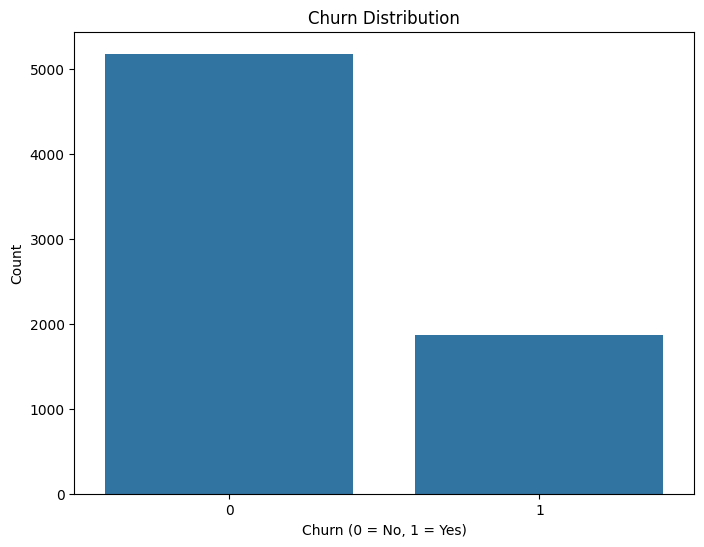

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn',data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

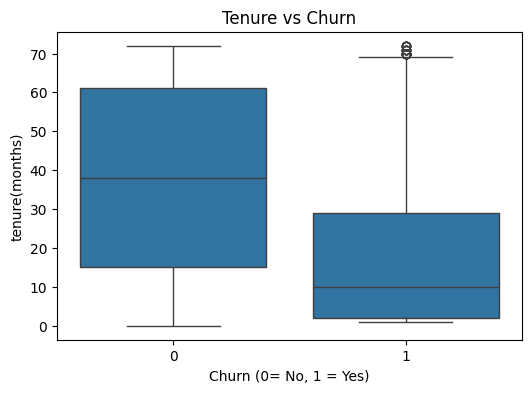

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn',y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0= No, 1 = Yes)")
plt.ylabel("tenure(months)")
plt.show()

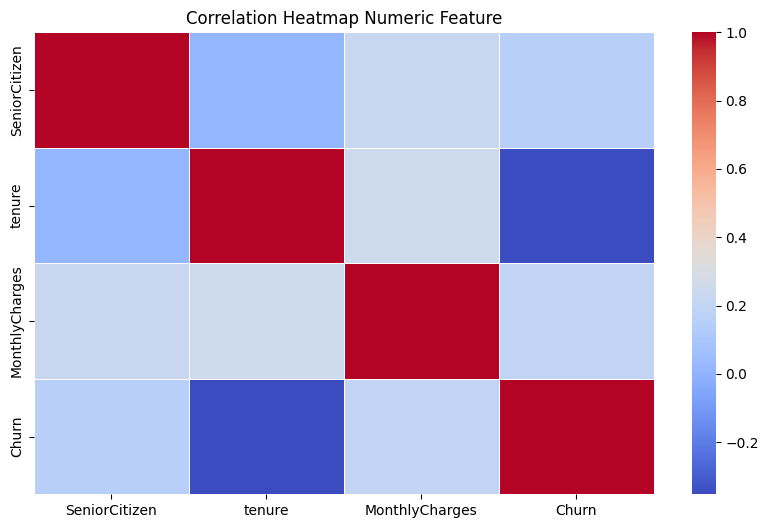

In [76]:
plt.figure(figsize=(10,6))
corr =data.select_dtypes(include=['number']).corr()

sns.heatmap(corr, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap Numeric Feature")
plt.show()

## 9. Conclusion


In this project, multiple machine learning models were evaluated for customer churn prediction.
Logistic Regression served as a baseline model, followed by Decision Tree and Random Forest classifiers.

Random Forest achieved the best overall performance, particularly improving recall, which is critical
for identifying customers likely to churn. Feature importance analysis revealed that tenure,
contract type, and monthly charges were key drivers of churn behavior.

Future improvements may include hyperparameter tuning, handling class imbalance, and deploying
the model as an API for real-time predictions.
